In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('winedataset.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 14)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [5]:
print(df.isnull().sum())

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64


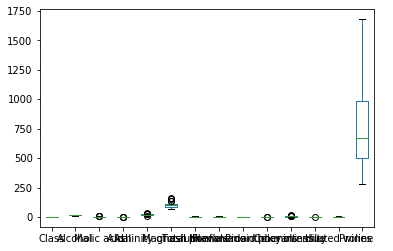

In [6]:
df.plot(kind='box')

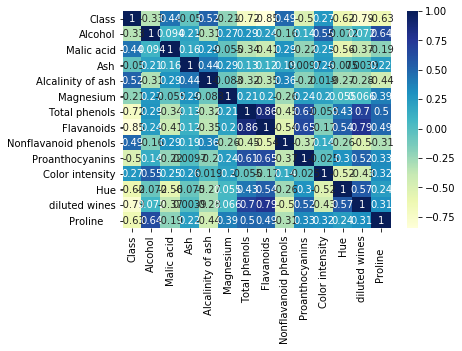

In [7]:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)

In [8]:
X= df.drop(['Class','Ash'], axis=1)
X.head()

,Alcohol,Malic acid,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,14.23,1.71,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
Y=df.iloc[:,:1]
Y.head(2)

,Class
0,1
1,1


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)

(124, 12)
(54, 12)


In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("eXtreme Gradient Boost:",XGBClassifier()))
models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

In [13]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,Y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

[00:36:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:36:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:36:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:36:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [ ]:
#accuracy over 90% denotes that quality of wine is very good among which
#Logistic Regression gives best result.